# Project description: analysis of the taxi dataset.

In [ ]:
# Preparation of the datasets for the further analisys.
# Checking the size of the dataframes, types of varibles, descriptive stats.
# Finding the platforms wich use the clients to call the taxi.
# Finiding the top client by the number of successfull taxi calls. 
# Finding the leading platform by the number of successfull taxi calls.
# Finding the prefered platform by the premium customers.
# Visualization of the distribution of the age of customers depending on the type of customer.
# Finding the age of the customers who have made the biggest number of successfull taxi calls.

In [ ]:
'''Preparation of the datasets for the further analysis.'''

In [3]:
import pandas as pd

import seaborn as sns

import matplotlib as plt

logs = pd.read_csv('./datasets/logs.csv')

user_data = pd.read_csv('./datasets/user_data.csv')

logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [5]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [23]:
'''Checking the size of the dataframes, types of varibles, descriptive stats.'''

logs.shape

(4500, 4)

In [24]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [25]:
user_data.shape

(2954, 3)

In [26]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [27]:
user_data.describe().round(2)

,client,age
count,2954.00,2954.00
mean,50767.89,44.20
std,28800.51,14.25
min,40.00,20.00
25%,25639.50,32.00
50%,51569.50,44.00
75%,75963.25,56.00
max,99973.00,69.00


In [6]:
'''What platforms use the customers to call a taxi?'''

logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [ ]:
'''Finiding the top client by the number of successfull taxi calls. 
In case more the 1 client made the same number of succesfull taxi calls, find their ids'''.

In [49]:
success_calc = logs.query('success == True') \
                    .groupby('client', as_index=False) \
                    .agg({'time': 'count'}) \
                    .sort_values('time', ascending=False) \
                    .rename(columns={'time': 'success_number'})

success_calc

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
...,...,...
956,34121,1
957,34191,1
958,34198,1
959,34277,1


In [52]:
clients_max_success = success_calc.query('success_number == 41').client.tolist()

print(*clients_max_success)

12179 61468 52870 61473 92584 82563 78349 36165 28719


In [2]:
'''What is the leading platform by the number of successfull taxi calls.'''

logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'time': 'count'})

,platform,time
0,computer,1090
1,phone,2019
2,tablet,180


In [81]:
'''What platform do the premium customers prefer?'''

logs.merge(user_data) \
        .query('premium == True') \
        .groupby('platform',as_index=False) \
        .count()[['platform', 'client']] \
        .rename(columns={'client':'num_clients'})


,platform,num_clients
0,computer,150
1,phone,246
2,tablet,24


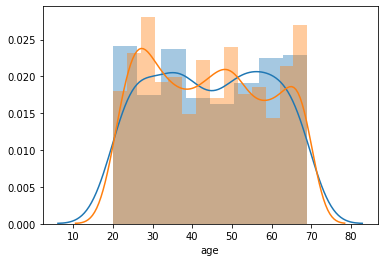

In [96]:
'''Visualization of the distribution of the age of customers depending on the type of customer 
(premium or not), using the seaborn library.'''

df = logs.merge(user_data)

sns.distplot(df.query('premium == True').age)
sns.distplot(df.query('premium == False').age)

In [22]:
'''Clients of what age have made the biggest number of successfull taxi calls.'''

df.query('success == True') \
    .groupby('age', as_index=False) \
    .agg({'success': 'count'}) \
    .sort_values('success', ascending=False) \
    .head(1)

,age,success
8,28,120
